# Dogs vs Cats

In [84]:
import numpy as np
from glob import glob
import cv2, os, random
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [86]:
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [87]:
path = 'dogs-vs-cats/train/'

In [88]:
# 사이즈 재설정 (모두 사이즈가 다르니까 한 사이즈로 통일시키기 위해서)
ROW, COL = 96, 96

dogs, cats = [],[]
y_dots, y_cats = [], []

In [89]:
dog_path = os.path.join(path, 'dog.5*')
len(glob(dog_path))

1111

In [90]:
# 1111개 강아지 이미지 로드

dog_path = os.path.join(path, 'dog.5*')
for dog_img in glob(dog_path):
    dog = cv2.imread(dog_img)
    dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
    dog = cv2.resize(dog, (ROW, COL))
    dog = image.img_to_array(dog)
    dogs.append(dog)

In [91]:
# 1111개 고양이 이미지 로드

cat_path = os.path.join(path, 'cat.5*')
for cat_img in glob(cat_path):
    cat = cv2.imread(cat_img)
    cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
    cat = cv2.resize(cat, (ROW, COL))
    cat = image.img_to_array(cat)
    cats.append(cat)

In [92]:
classes = ['dog','cat']

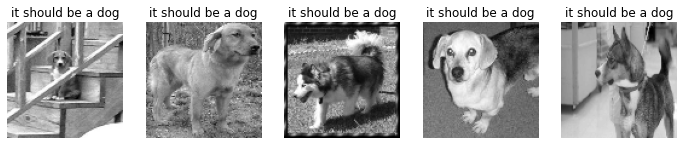

In [93]:
plt.figure(figsize=(12,8))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(dogs))
    plt.imshow(img, cmap = plt.get_cmap('gray'))
    
    plt.axis('off')
    plt.title('it should be a {}'.format(classes[0]))
plt.show()

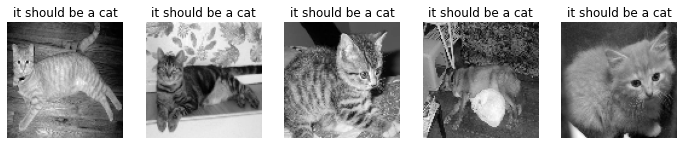

In [94]:
plt.figure(figsize=(12,8))
for i in range(5):
    plt.subplot(1,5, i+1)
    img = image.array_to_img(random.choice(cats))
    plt.imshow(img, cmap = plt.get_cmap('gray'))
    
    plt.axis('off')
    plt.title('it should be a {}'.format(classes[1]))
plt.show()

In [95]:
# 라벨을 0 과 1로 바꿔줌
y_dogs = [1 for item in enumerate(dogs)]
y_cats = [0 for item in enumerate(cats)]

In [96]:
# 모델에 맞게 넘파이 배열로 변환
# X와 target 파일을 만든다
#0~1까지의 값으로 바꾸기 위해서
dogs = np.asarray(dogs).astype('float32') / 255
#reshape하는 과정과 같음
cats = np.asarray(cats).astype('float32') / 255
y_dogs = np.asarray(y_dogs).astype('int32')
y_cats = np.asarray(y_cats).astype('int32')

In [74]:
dogs.shape

(1111, 96, 96, 1)

In [75]:
X_train = np.concatenate((dogs, cats), axis=0)
y_train = np.concatenate((y_dogs, y_cats), axis=0)

In [76]:
len(X_train)

2222

In [77]:
y_train.shape, y_test.shape

((2222,), (2222, 2))

In [82]:
# one-hot encoding (여기선 굳이 할 필요x->이렇게 안해도됨)
y_train = keras.utils.to_categorical(y_train, 2)

## Test set 만들기

In [97]:

dogs, cats = [], []
y_dogs, y_cats = [], []

In [98]:
dog_path = os.path.join(path, 'dog.12*')
len(glob(dog_path))

611

In [99]:

## Load some our dog images (611 개 이미지)
dog_path = os.path.join(path, 'dog.12*')
for dog_img in glob(dog_path):
    dog = cv2.imread(dog_img)
    dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
    dog = cv2.resize(dog, (ROW, COL))
    dog = image.img_to_array(dog)
    dogs.append(dog)

In [100]:
cat_path = os.path.join(path, 'cat.12*')
for cat_img in glob(cat_path):
    cat = cv2.imread(cat_img)
    cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
    cat = cv2.resize(cat, (ROW, COL))
    cat = image.img_to_array(cat)
    cats.append(cat)

In [101]:
y_dogs = [1 for item in enumerate(dogs)]
y_cats = [0 for item in enumerate(cats)]

In [112]:
dogs = np.asarray(dogs).astype('float32') / 255
cats = np.asarray(cats).astype('float32') / 255
y_dogs = np.asarray(y_dogs).astype('int32')
y_cats = np.asarray(y_cats).astype('int32')

In [113]:

X_test = np.concatenate((dogs, cats), axis=0)
y_test = np.concatenate((y_dogs, y_cats), axis=0)

In [114]:
## One-Hot Encoding
y_test = keras.utils.to_categorical(y_test, 2)

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_test, y_test, stratify = y_test, test_size=.2, random_state=seed)

## 모델 생성

In [117]:
model = Sequential([
    Conv2D(32, (3,3), padding='same', input_shape=(ROW, COL, 1), activation='relu'), #padding 사이즈 똑같이
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)), # 사이즈가 반으로 줄어듦(48x48)
    Dropout(.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(.5),
    Dense(2, activation='softmax')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 96, 96, 32)        320       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 48, 48, 64)        18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 24, 24, 64)       

In [118]:
model.compile(loss='categorical_crossentropy', optimizer =Adam(), metrics = ['accuracy'])

In [120]:
modelpath = 'model/dogs_vs_cats-cnn-{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

## 모델 학습

In [121]:
X_train.shape

(977, 96, 96, 1)

In [122]:
y_train.shape

(2222, 2)

In [123]:
X_test.shape

(245, 96, 96, 1)

In [124]:
model.fit(X_train, Y_train, batch_size=32, epochs =3, validation_split=0.2, callbacks=[checkpointer, early_stopping_callback])

Train on 781 samples, validate on 196 samples
Epoch 1/3
768/781 [============================>.] - ETA: 0s - loss: 0.6944 - accuracy: 0.5065
Epoch 00001: val_loss improved from inf to 0.69429, saving model to model/dogs_vs_cats-cnn-01-0.6943.hdf5
781/781 [==============================] - 29s 37ms/sample - loss: 0.6945 - accuracy: 0.5045 - val_loss: 0.6943 - val_accuracy: 0.4796
Epoch 2/3
768/781 [============================>.] - ETA: 0s - loss: 0.6934 - accuracy: 0.5104
Epoch 00002: val_loss improved from 0.69429 to 0.69296, saving model to model/dogs_vs_cats-cnn-02-0.6930.hdf5
781/781 [==============================] - 28s 36ms/sample - loss: 0.6934 - accuracy: 0.5109 - val_loss: 0.6930 - val_accuracy: 0.5204
Epoch 3/3
768/781 [============================>.] - ETA: 0s - loss: 0.6934 - accuracy: 0.4974
Epoch 00003: val_loss did not improve from 0.69296
781/781 [==============================] - 26s 33ms/sample - loss: 0.6935 - accuracy: 0.4981 - val_loss: 0.6934 - val_accuracy: 0.47

In [41]:
from tensorflow.keras.models import load_model
del model

In [42]:
model = load_model('model/dogs_vs_cats-cnn-01-0.6744.hdf5')

In [43]:
scores = model.evaluate(X_test, Y_test, verbose=2)
print('MODEL ACCURACY: %.5f' % scores[1])

ValueError: Error when checking input: expected conv2d_4_input to have 4 dimensions, but got array with shape (2222, 1)

In [ ]:
scores = model.evaluate(X_)